### 导入模块

In [ ]:
import pandas as pd  
from datetime import datetime
import backtrader as bt
import matplotlib.pyplot as plt

### params

In [ ]:
#添加移动均线指标，内置了talib模块、
params=(('maperiod',20),)
self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.maperiod)
--------------------------------------------------------------------------------------------
params = {"fast": 20, "slow": 50,                  # The windows for both fast and slow moving averages
              "optim": False, "optim_fs": (20, 50)}  params当中传入的是字典

### next

In [ ]:
# 检查是否有指令等待执行, 
if self.order: 
    return

In [ ]:
# 检查是否持仓   
if not self.position: # 没有持仓
    ...
else:
    ...

In [ ]:
#执行买入条件判断：收盘价格上涨突破20日均线
if self.dataclose[0] > self.sma[0]:

In [ ]:
#执行买入
self.order = self.buy(size=500)   
---------------------------------
# 还没买，如果 MA5 > MA10 说明涨势，买入
if self.sma5[0] > self.sma10[0]:
    self.log('BUY CREATE, %.2f' % self.dataclose[0])
    self.order = self.buy()

In [ ]:
#执行卖出
self.order = self.sell(size=500)

In [ ]:
# 记录收盘价
self.log('Close, %.2f' % self.dataclose[0])

### notify_order

In [ ]:
def notify_order(self, order):
    """
    订单状态处理

    Arguments:
        order {object} -- 订单状态
    """
    if order.status in [order.Submitted, order.Accepted]:
        # 如订单已被处理，则不用做任何事情
        return

    # 检查订单是否完成
    if order.status in [order.Completed]:
        if order.isbuy():
            self.buyprice = order.executed.price
            self.buycomm = order.executed.comm
        self.bar_executed = len(self)

    # 订单因为缺少资金之类的原因被拒绝执行
    elif order.status in [order.Canceled, order.Margin, order.Rejected]:
        self.log('Order Canceled/Margin/Rejected')

    # 订单状态处理完成，设为空
    self.order = None

### notify_trade

In [ ]:
def notify_trade(self, trade):
    """
    交易成果

    Arguments:
        trade {object} -- 交易状态
    """
    if not trade.isclosed:
        return

    # 显示交易的毛利率和净利润
    self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
             (trade.pnl, trade.pnlcomm), doprint=True)

### stop

In [ ]:
def stop(self):
    self.log(u'(金叉死叉有用吗) Ending Value %.2f' %
             (self.broker.getvalue()), doprint=True)

### feeds

In [ ]:
# 加载数据
data = bt.feeds.PandasData(dataname=dataframe,fromdate=start,todate=end)

### Cerebro

In [ ]:
# 初始化cerebro回测系统设置                           
cerebro = bt.Cerebro()  
#将数据传入回测系统
cerebro.adddata(data) 
# 将交易策略加载到回测系统中
cerebro.addstrategy(my_strategy1) 
# 设置初始资本为10,000
startcash = 10000
cerebro.broker.setcash(startcash) 
# 设置交易手续费为 0.03%
cerebro.broker.setcommission(commission=0.0003)
#运行回测系统
cerebro.run()
#获取回测结束后的总资金
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash #盈亏

### print

In [ ]:
print(f'初始资金: {startcash}\n回测期间：{d1}:{d2}')

In [ ]:
print(f'总资金: {round(portvalue,2)}')

### Plot

In [ ]:
cerebro.plot(style='candlestick')

In [ ]:
#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']

In [ ]:
图形大小控制，买入卖出点控制，回测曲线修正，夏普比率等指标控制

### log

In [ ]:
def log(self, txt, dt=None, doprint=False):
    ''' 日志函数，用于统一输出日志格式 '''
    if doprint:
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

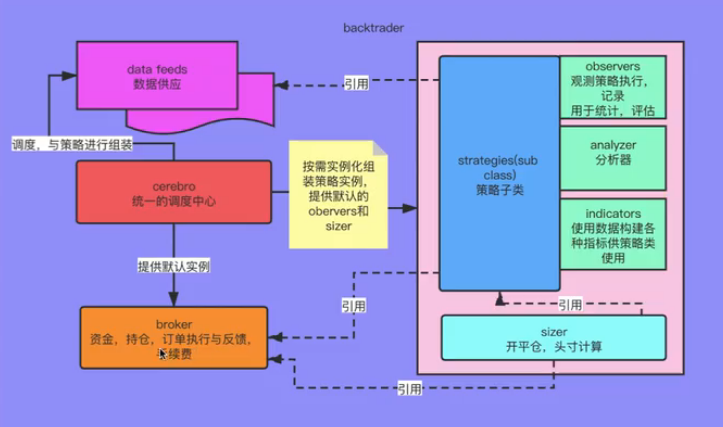